In [1]:
# Set up
import sys
sys.path.append('C:/Users/jin/Desktop/Python/venv/Lib/site-packages')

from nilearn import plotting
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# 우선 받은 데이터에서 전처리 된걸로 보자
# 원래는 전처리 안될걸 봐야하는데.. 전처리 되기 전 파일이 IMA확장자라 어쩔 수 없이 된걸해보자.
from nilearn import image as nli
t1 = nli.load_img('C:/Users/jin/Desktop/data/fmri/3. derivatives 폴더에 넣어야 하는 것 (전처리 후 데이터, MNI 템플릿)/tpl-MNI152NLin2009cAsym/tpl-MNI152NLin2009cAsym_res-02_T1w.nii.gz')
bold = nli.load_img('C:/Users/jin/Desktop/data/fmri/3. derivatives 폴더에 넣어야 하는 것 (전처리 후 데이터, MNI 템플릿)/fmriprep/sub-ID2207071/func/sub-ID2207071_task-r1_space-T1w_desc-preproc_bold.nii.gz')


뭐시기 안정 상태 뭐시기라 해서 처음 5개의 볼륨을 잘라내 본다함.. 근데 이거하면 뒤에 움직임 보정이 안됨. 우선 하지말자

In [19]:
# bold = bold.slicer[...,5:]

# 1. Image manipulation with nilearn## 
Let's create a mean image
If you use nibabel to compute the mean image, you first need to load the img, get the data and then compute the mean thereof. With nilearn, you can do all this in just one line with mean image

In [3]:
img = nli.mean_img(bold)


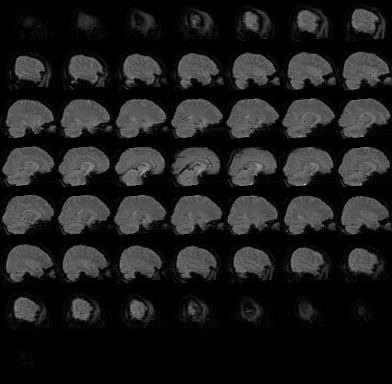
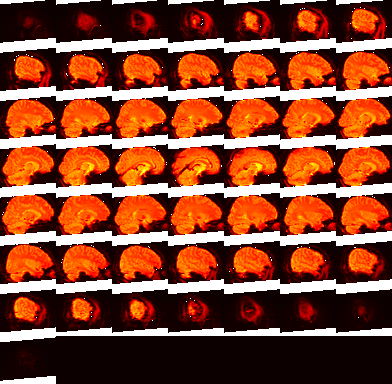

In [4]:
# 처음 : 시각화하려는거, 둘 : 매개변수. 배경이미지로 쓸거 말하는 거임.
# 그림보면 커서 옮겨서 볼수있음
plotting.view_img(img, bg_img=img)


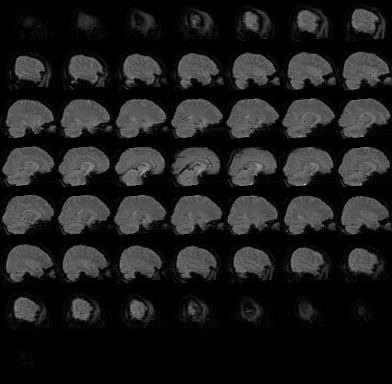
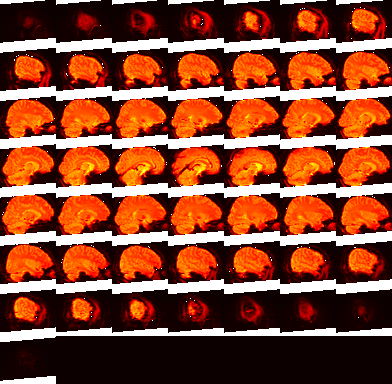

In [5]:
# 그냥 bold로 하면 어떨까
bold_raw = nli.load_img('C:/Users/jin/Desktop/data/fmri/3. derivatives 폴더에 넣어야 하는 것 (전처리 후 데이터, MNI 템플릿)/fmriprep/sub-ID2207071/func/sub-ID2207071_task-r1_space-T1w_desc-preproc_bold.nii.gz')
img1 = nli.mean_img(bold_raw)
plotting.view_img(img, bg_img=img)
# 전처리 해놓은거라 비슷한듯...??

## Resmaple image to a template
`resample_to_img`로 T1이미지 사용해서 resample가능

In [6]:
mean = nli.mean_img(bold)
print([mean.shape, t1.shape])
# 결과보면 mean.shape가 더 작음. t1shape를 맞춰줌.

[(50, 56, 48), (97, 115, 97)]


In [7]:
resampled_t1 = nli.resample_to_img(t1,mean)
resampled_t1.shape

(50, 56, 48)

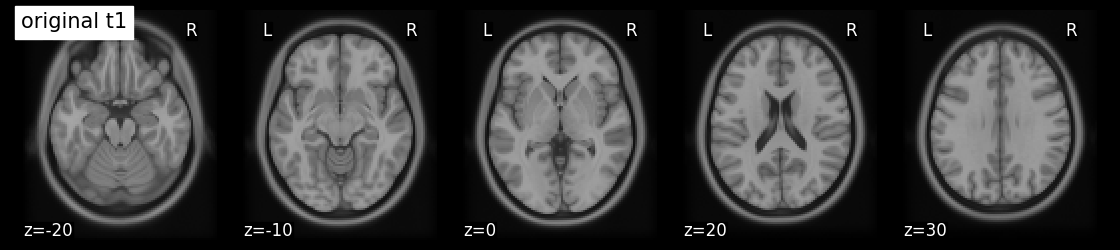

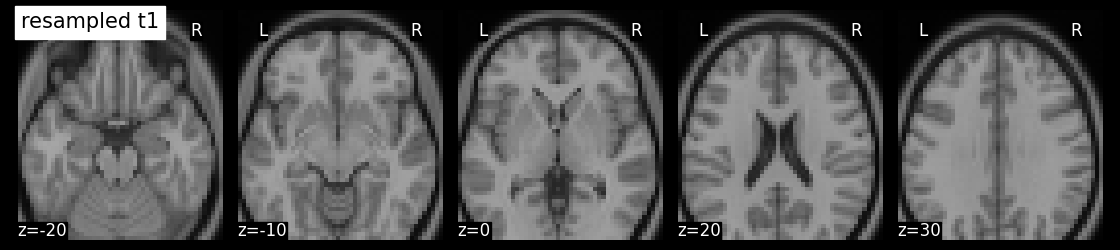

In [8]:
from nilearn import plotting
plotting.plot_anat(t1, title='original t1', display_mode='z', dim=1,
                   cut_coords=[-20,-10,0,20,30])
plotting.plot_anat(resampled_t1, title='resampled t1', display_mode='z', dim=1,
                   cut_coords=[-20,-10,0,20,30])

# 이미 전처리된걸 써서 그런지 더 망한거 같다. 원래는 둘이 바꿔서 결과가 나오는 느낌인듯

## Smoothing an image


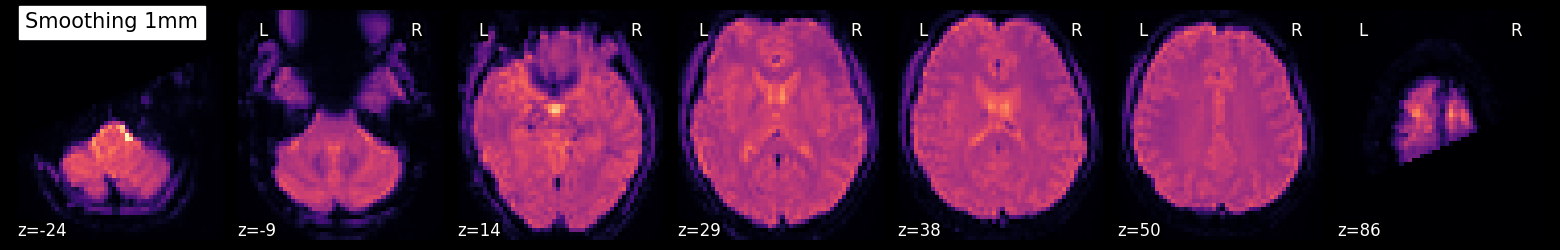

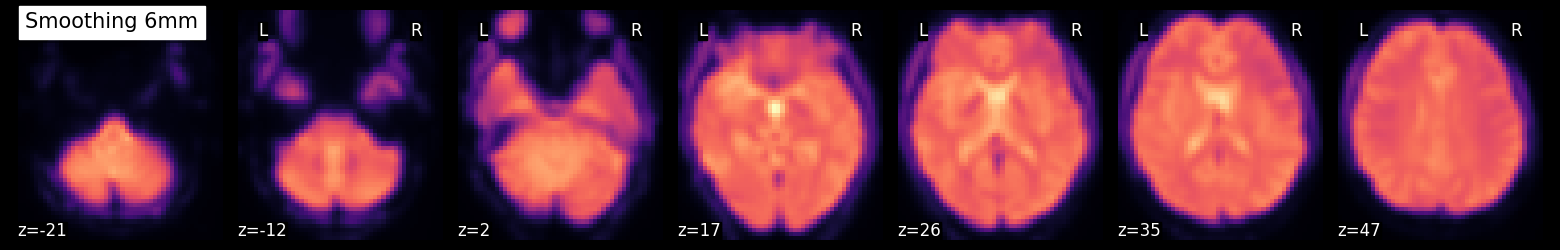

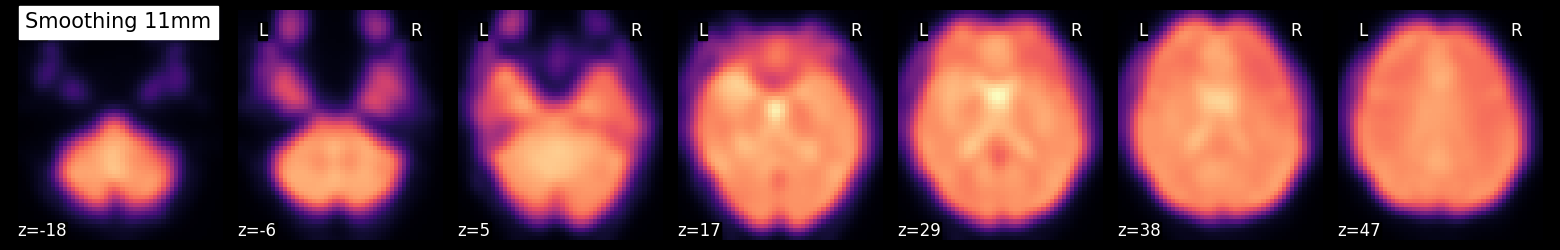

In [9]:
for fwhm in range(1,12,5):
    smoothed_img = nli.smooth_img(mean,fwhm)
    plotting.plot_epi(smoothed_img, title = 'Smoothing %imm'% fwhm,
    display_mode='z', cmap='magma')
# 보면 스무딩 1mm일때가 뭔가 젤 좋아보이긴함. 난 잘모름 어쨋든 그런거같음.

## Clean an image to improve SNR
SNR이 신호 대 잡음 비율이라고함.. 많이 봤던 전처리하는 과정
1. detrend : 추세 제거
2. standardize: 데이터 표준화
3. remove confounds : 혼입 변수 제거
4. low and high pass filter : 저주파, 고주파 필터링

In [10]:
# 우선 Timeseries 가져오기
TR = bold.header['pixdim'][4]
print(bold.header, '\n','TR :',TR)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  4  50  56  48 275   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1. 3. 3. 3. 2. 1. 1. 1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 2019.9656
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'xform matrices modified by FixHeaderApplyTransforms (niworkflows v1.6.4).'
aux_file        : b''
qform_code      : aligned
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : -71.61582
qoffset_y     

pixdim은 데이터의 각축 (x,y,z,시간 등)에 대한 픽셀 크기 또는 공간적 간격 나타냄 아래 예로들면
[1. 3. 3. 3. 2. 1. 1. 1.]

2 번째 '3': x 축의 픽셀 크기 또는 간격을 나타냅니다.

3 번째 '3': y 축의 픽셀 크기 또는 간격을 나타냅니다.

4 번째 '3': z 축의 픽셀 크기 또는 간격을 나타냅니다.

5 번째 '2': 시간 차원의 픽셀 크기 또는 간격을 나타냅니다. 이 값은 시간 간격이 2 단위임을 나타냅니다.

In [11]:
# detrend. clean_img함수가 저주파 고주파도 없애줄수있음. 여기선 안넣음
func_d = nli.clean_img(bold, detrend=True, standardize =False, t_r=TR)

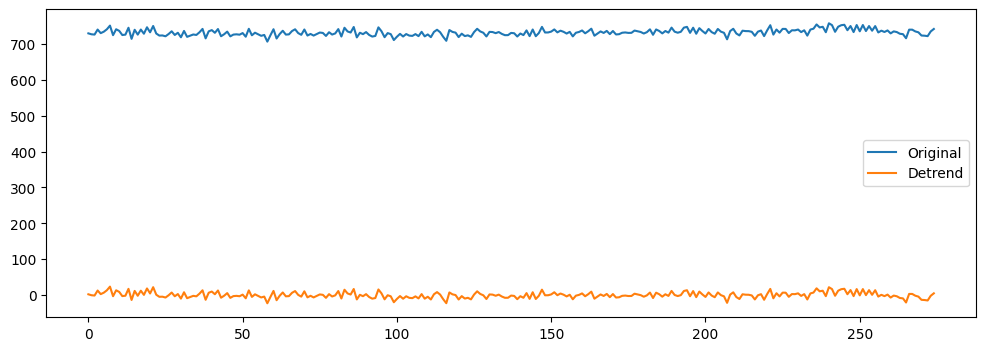

In [12]:
# plot the original and detrend timecourse of a random voxel
x,y,z = [31,14,7] # 그냥 복셀 아무거나 가져온듯 어쩃든 그래프 보면 뭔가 많이줄음
plt.figure(figsize=(12,4))
plt.plot(np.transpose(bold.get_fdata()[x,y,z,:]))
plt.plot(np.transpose(func_d.get_fdata()[x,y,z,:]))
plt.legend(['Original', 'Detrend'])

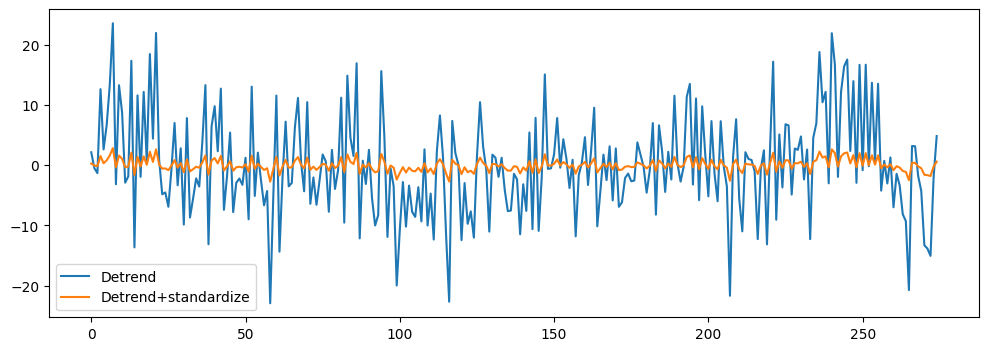

In [13]:
# 이번엔 standardize보자.
func_ds = nli.clean_img(bold, detrend=True, standardize=True, t_r=TR)

plt.figure(figsize=(12, 4))
plt.plot(np.transpose(func_d.get_fdata()[x, y, z, :]))
plt.plot(np.transpose(func_ds.get_fdata()[x, y, z, :]))
plt.legend(['Detrend', 'Detrend+standardize']);

마지막으로 remove the influence of the motion parameters from the sigmal

In [14]:
# 그냥하려니까 confounds 데이터에 n/a있음.. 데이터 대충 보니까 우선 0으로 근사해도 될거같아서 0으로 따로 저장해서씀
# 근데 난 잘 모르니까 우선은..
func_ds_c = nli.clean_img(bold, detrend=True, standardize=True, t_r=TR,
                          confounds='C:/Users/jin/Desktop/data/fmri/3. derivatives 폴더에 넣어야 하는 것 (전처리 후 데이터, MNI 템플릿)/fmriprep/sub-ID2207071/func/sub-ID2207071_task-r1_desc-confounds_timeseries_1.tsv')

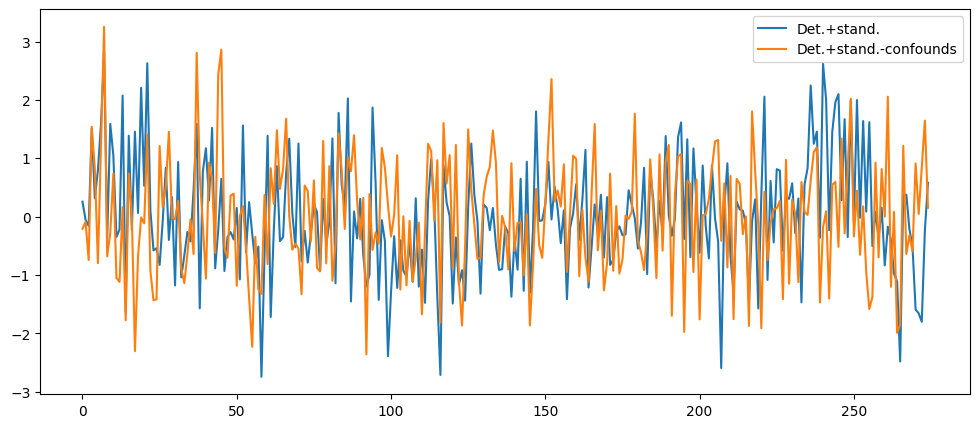

In [15]:
plt.figure(figsize=(12, 5))
plt.plot(np.transpose(func_ds.get_fdata()[x, y, z, :]))
plt.plot(np.transpose(func_ds_c.get_fdata()[x, y, z, :]))
plt.legend(['Det.+stand.', 'Det.+stand.-confounds']);

## 여기까지 결과를 보면 알겠지만
하진센빠이가 하신 전처리 코드보면 **T1, 움직임**을 전처리했음.
그래서 우리가 이 코드로 했을 때 마지막에한 **움직임과** 맨 처음한 **T1**에서는 변화가 없음.

## Mask an image and extract an average signal of a region
nilearn이 좋은게, 이미지를 numpy 배열로 다루게 해줌. 이점이
1. 이미지의 평균 이미지 생성 가능
2. 해당 이미지를 임계값으로 설정하여 모든 복셀중 95%보다 큰 값을 가진 복셀만 유지가능
    = 유의수준 0.05에서 유의한거 보는 말이죠?
3. 이 임계값으로 설정된 이미지 중에서 1000mm^3보다 큰 영역만 선택 가능.(난 이게 뭔소린지..)
4. 마지막으로 이러한 영역을 이진화해서 마스크 이미지 만들 수 있음
    = 이게 무슨 말이냐면, 선택한 영역:1, 안한 영역:0으로 만들어서 그 영역만 뽑아내서 분석에 사용

In [16]:
# 평균내기
mean = nli.mean_img(bold)

In [17]:
# 임계값 설정
thr = nli.threshold_img(mean, threshold='95%')


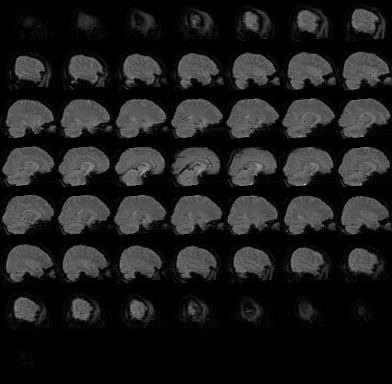
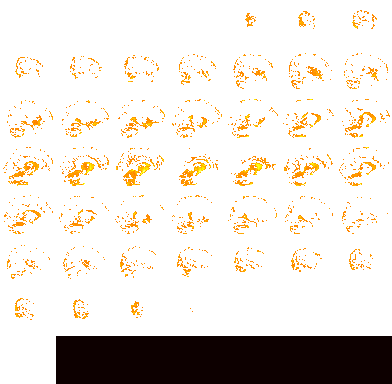

In [18]:
plotting.view_img(thr, bg_img=img)
# 임계값 넘는 복셀들..

자 이제 여기서 1000mm^3보다 큰 영역에 있는 복셀만 유지해보자.(왜그런지 보니까 너무 작으면 영역의 의미가 없어서 그런듯?)
만약에 언어영역 뇌에서 복셀 한두개만 임계값을 넘었을 때 그게 의미가 있나? 이래서 그런듯

In [19]:
voxel_size = np.prod(thr.header['pixdim'][1:4]) # size of 1 voxel in mm^3
voxel_size

27.0

이제 영역 유지하는 마스크 만들어보자.

In [20]:
# 클러스터 만들기
from nilearn.regions import connected_regions
cluster = connected_regions(thr, min_region_size=1000./voxel_size, smoothing_fwhm=1)[0]

In [21]:
# 클러스터 파일 이진화해서 마스크 생성
mask = nli.math_img('np.mean(img,axis=3) > 0', img=cluster)

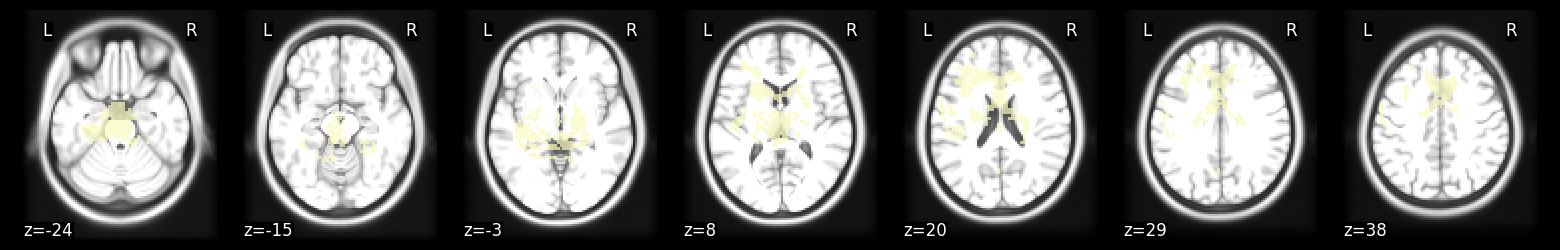

In [22]:
from nilearn.plotting import plot_roi
# 뇌구조이미지(T1)에 그려보면서 확인해보기.
plotting.plot_roi(mask, bg_img = t1, display_mode='z', dim=-.5, cmap='magma_r')

# 잘 안보일거 같은데 노란색 부분이 해당 마스크가 가진 뇌영역인거 같음.

이제 원 fMRI데이터에 마스크 적용하고 시계열 신호 평균 추출

In [23]:
# 원데이터(어쩔수 없이 우리는 전처리한 데이터)에 마스크 적용해보기.
from nilearn.masking import apply_mask
import pandas as pd

all_timecourses = apply_mask(bold, mask)
print(pd.DataFrame(all_timecourses))

# 결과는 275time series.. 3964개의 뇌 영역 복셀에 대한 시계열 데이터.

           0           1           2           3           4           5     \
0    827.620265  882.638781  873.330326  935.807935  835.973216  859.706693   
1    835.911570  898.019307  890.868441  937.256602  826.633938  860.384793   
2    820.253640  894.074002  878.231135  929.119409  826.202421  850.860579   
3    826.510648  894.659633  879.556511  930.999594  818.558392  852.155132   
4    825.339385  886.460795  875.765319  929.150232  821.918066  856.963473   
..          ...         ...         ...         ...         ...         ...   
270  842.106933  903.536570  887.323831  938.242928  827.866846  865.747942   
271  839.178776  881.529164  876.474241  939.383368  825.061981  864.237630   
272  839.856876  904.245492  883.717575  933.835282  833.877272  864.422566   
273  843.925472  896.663108  876.813291  945.979425  844.048763  873.422794   
274  835.110180  888.340980  871.604255  940.092290  830.086081  874.871461   

           6           7           8           9   

In [ ]:
'''
아래 코드로 다시 3D,4D 데이터로 바꿀수 있음

from nilearn.masking import unmask
img_timecourse = unmask(all_timecourses, mask)
'''

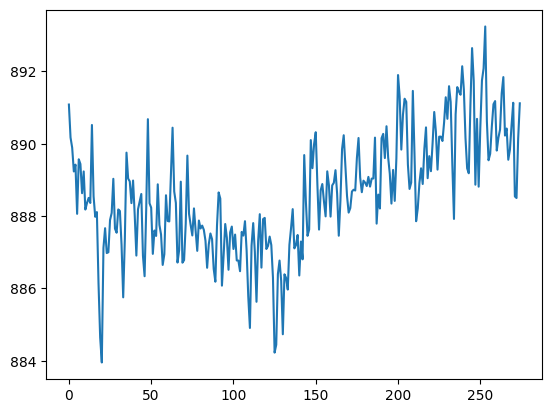

In [24]:
# 추출된 시계열 데이터 평균 신호 계산.
mean_timecourse = all_timecourses.mean(axis=1)
plt.plot(mean_timecourse)

친절히 설명하자면... 우리가 아까 유의수준 95% 설정으로 활동한 voxel에 대해 보았고,
그 voxel들에게 특정한 기준을 주어 영역을 만들었음. 그 영역내의 voxel들을 시계열을 통해 활성화 점수를 얻음
그리고 시계열 안의 각 초별로 영역내 복셀들의 평균 값으로 그래프를 그린것이 위 그래프.
하지만 저는 인지에 대해 잘 몰라서 틀렸을 수도 있어요.